In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [3]:
train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

<BarContainer object of 3 artists>

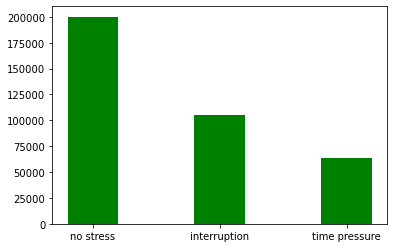

In [4]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)


In [5]:
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
test['condition'] = le.transform(test['condition'])

In [6]:
profile = pp.ProfileReport(train)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/50 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

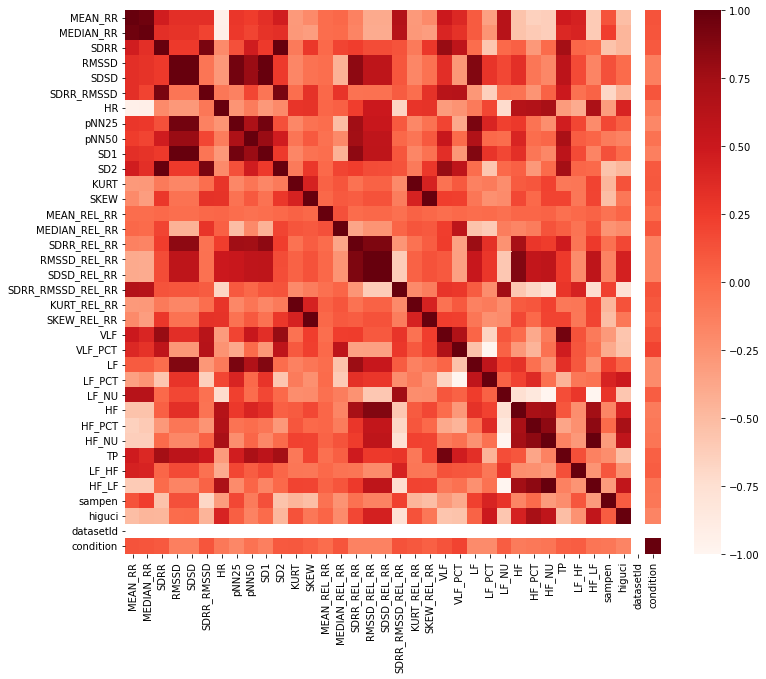

In [7]:
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [8]:
def feature_selection(correlation,threshold):
    selected_features = []
    for i in range(corr.shape[0]):
      if corr.iloc[i,35] > threshold:
        selected_features.append(train.iloc[:,i])
    return pd.DataFrame(selected_features).T

In [9]:
CORRELATION_THRESHOLD = 0.1
reduced_train = feature_selection(corr,CORRELATION_THRESHOLD)

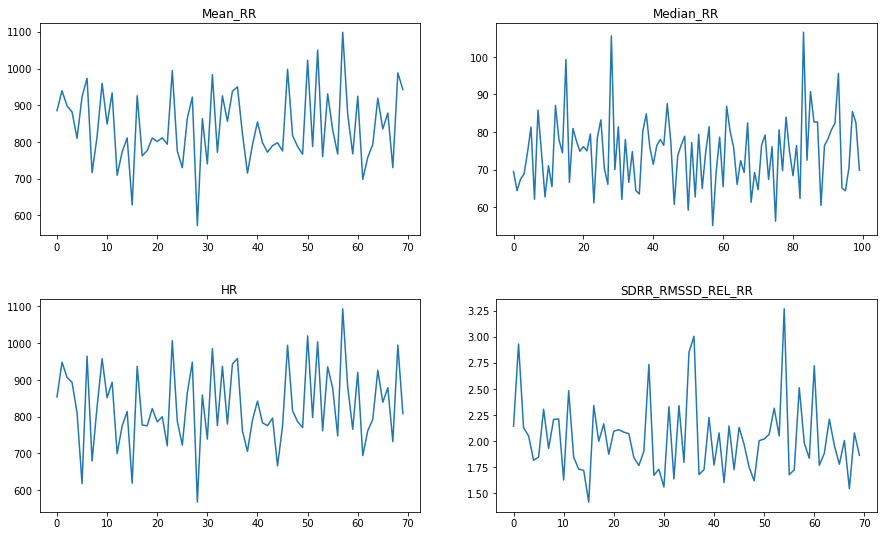

In [102]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
reduced_train['MEAN_RR'][:70].plot(ax=axarr[0][0])
reduced_train['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
train['HR'][:100].plot(ax=axarr[0][1])
reduced_train['SDRR_RMSSD_REL_RR'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("HR")
axarr[1][1].set_title("SDRR_RMSSD_REL_RR")
plt.subplots_adjust(hspace=.3)

<AxesSubplot:>

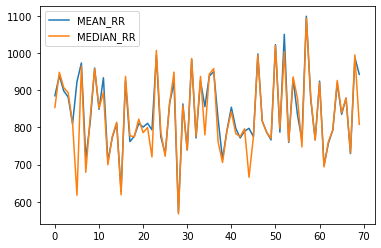

In [101]:
train[['MEAN_RR','MEDIAN_RR']][:70].plot()

In [12]:
X_train = reduced_train.iloc[:,:-1]
y_train = reduced_train.iloc[:,-1]
X_test = test[X_train.columns]
y_test = test['condition']
X_train.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366


In [13]:
X_test.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,721.901897,727.267280,6.044877,-0.000951,1.570800,1016.073759,59.818117
1,843.538633,844.407930,3.031234,-0.001543,1.918953,765.518473,32.452560
2,958.523868,966.671125,6.224565,-0.002000,2.298473,2237.739905,51.696218
3,824.838669,842.485905,10.008830,0.000445,2.116033,2330.980957,81.661325
4,756.707933,747.941620,10.777899,-0.000170,1.681034,4750.624447,89.465158


In [14]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
RandomForestClassifier()
y_pred = model.predict(X_test)
y_pred[:20]

array([1., 2., 1., 1., 0., 2., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0.])

In [15]:
accuracy_score(y_test,y_pred)

1.0

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

